In [ ]:
class Image:
  import numpy as np
  def __init__(self, data: np.ndarray): #data er datatype np.ndarry
      self.data= data
      self.height= data.shape[0]
      self.width = data.shape[1]
      self.datatype= data.dtype

  def is_grayscale(self):
    return len(self.data.shape) == 2

  def imshow(self):
    import matplotlib.pyplot as plt
    if (self.is_grayscale()):
      plt.imshow(self.data, cmap="gray")


  def histogram(self, intensity_resolution=8, normalize=False):
    import numpy as np
    if (self.is_grayscale()):
      bins = np.arange(0, 2**intensity_resolution ,1) #spacing hbe 1
      hist= np.zeros_like(bins) #bins er shape er array dibe or np.zeros( 2**intensity_resolution)
      for i in range(self.height):
        for j in range(self.width):
          hist[self.data[i,j]]= hist[self.data[i,j]] + 1

      if (normalize):
        hist = hist / (self.height * self.width)

    return bins, hist


  def plot_histogram(self, intensity_resolution = 8, normalize=False):
    import matplotlib.pyplot as plt
    bins, hist =self.histogram(intensity_resolution= intensity_resolution, normalize=normalize)
    plt.plot(bins,hist)

  def cumulative_hist(self, intensity_resolution = 8, normalize=False):
    print(123)
    total=0
    bins, hist =self.histogram(intensity_resolution= intensity_resolution, normalize=normalize)
    cum= np.zeros_like(bins)

    for i in range(len(hist)):
      total+= hist[i]
      cum[i]= total

    if (normalize):
        cum = cum / (self.height * self.width)

    return bins,cum


  def plot_cumulative_histogram(self, intensity_resolution = 8, normalize=False):
    import matplotlib.pyplot as plt
    bins, cum =self.cumulative_hist(intensity_resolution= intensity_resolution, normalize=normalize)
    plt.plot(bins,cum)

  def contrast_stretching(self, intensity_resolution = 8, normalize=False):
    import numpy as np
    stretched_I= Image(self.data/2 ** intensity_resolution) #normalize (r)
    L = stretched_I.data.min()
    H = stretched_I.data.max()
    stretched_I.data= np.clip((stretched_I.data - L) * (1/(H-L)),0,1)*2**intensity_resolution #transform, and denormalize korar jnno intensity resolution diye multiply krbo
    stretched_I.data= (stretched_I.data).astype(np.uint8)
    return stretched_I



  def power_transform(self, gamma):
    pass




In [ ]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img2= data.clock()

In [ ]:
I2=Image(img2)

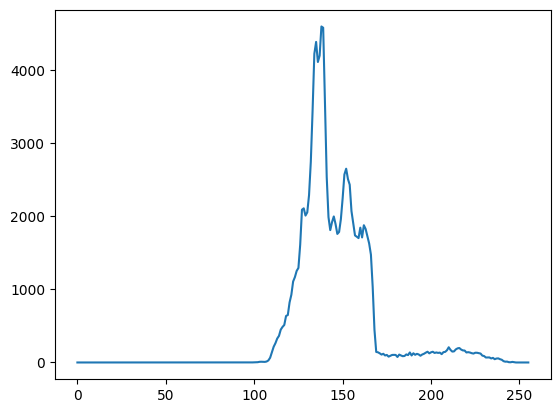

In [ ]:
I2.plot_histogram(normalize=False)

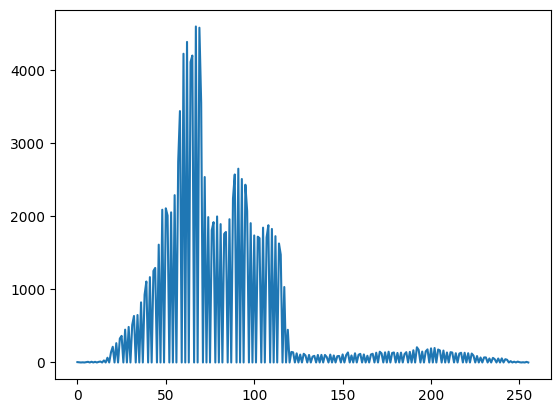

In [ ]:
I3=I2.contrast_stretching()
I3.plot_histogram(normalize=False)

In [ ]:
#img = data.camera()

In [ ]:
#I =Image(img)

In [ ]:
#I.width

512

In [ ]:
#I.height

512

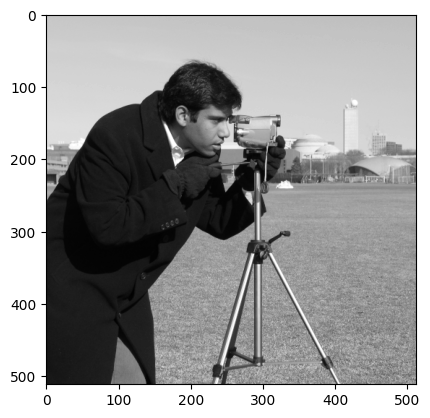

In [ ]:
#I.imshow()

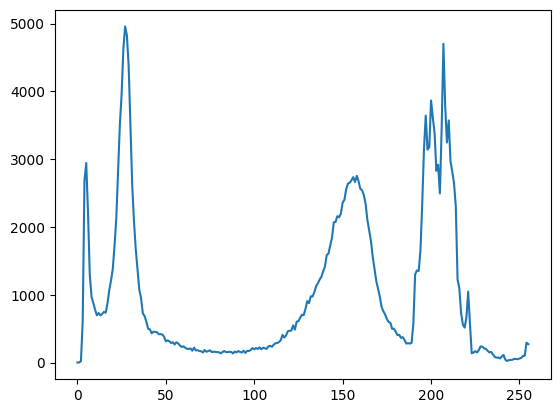

In [ ]:
I.plot_histogram(normalize=False)

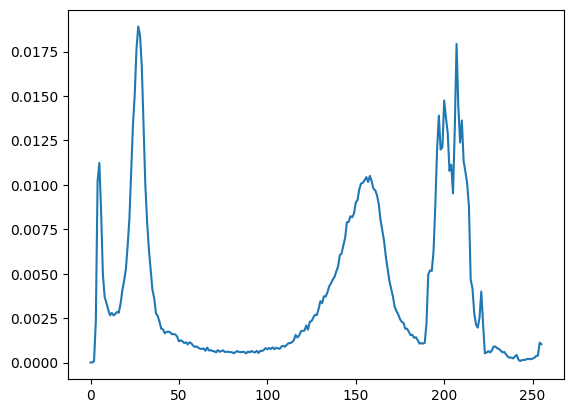

In [ ]:
I.plot_histogram(normalize=True)

In [ ]:
I.cumulative_hist(normalize=False)

123


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

123


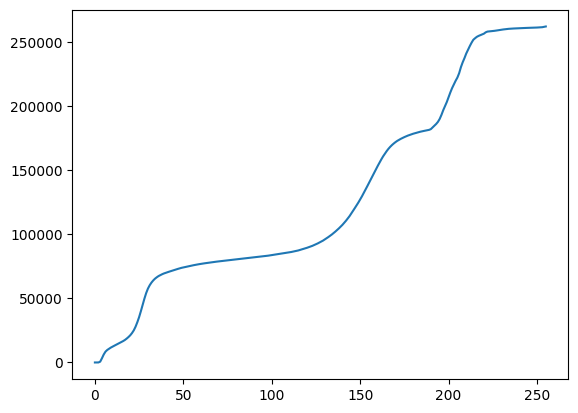

In [ ]:
I.plot_cumulative_histogram(normalize=False)

123


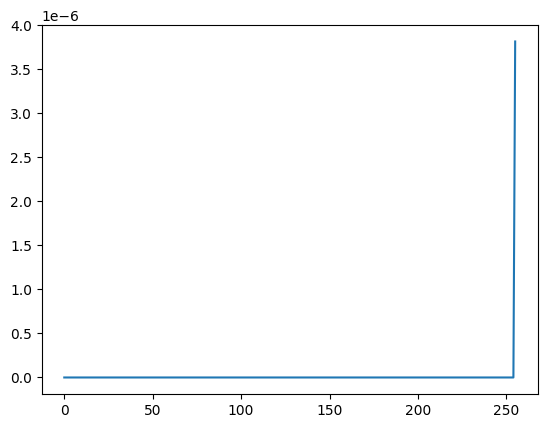

In [ ]:
I.plot_cumulative_histogram(normalize=True)

In [ ]:
img = data.camera()

123
123


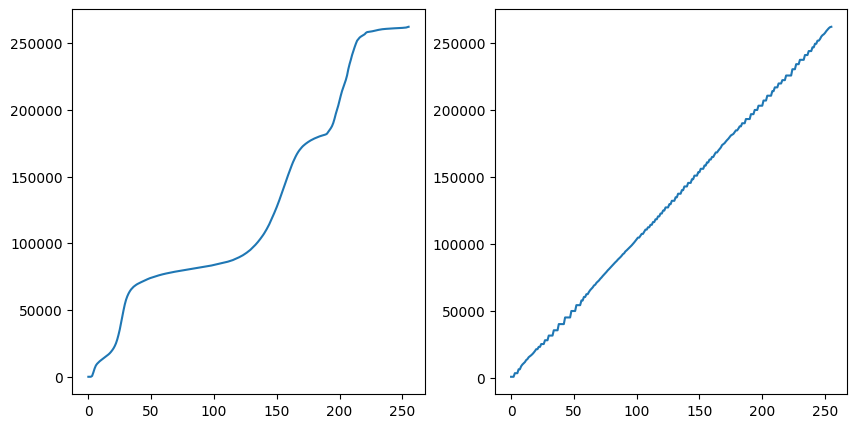

In [ ]:
from skimage import exposure

img_eq = exposure.equalize_hist(img)
I4= Image((img_eq*255).astype(np.uint8))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
I.plot_cumulative_histogram()

plt.subplot(1,2,2)
I4.plot_cumulative_histogram()

plt.show()


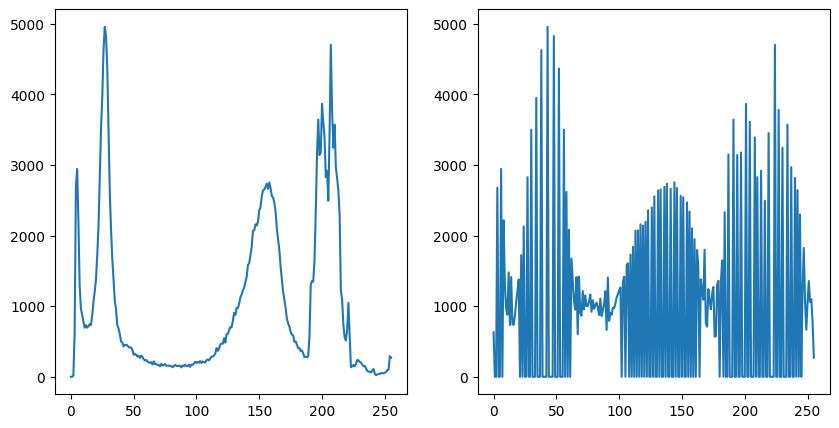

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
I.plot_histogram()

plt.subplot(1,2,2)
I4.plot_histogram()

plt.show()